<a href="https://colab.research.google.com/github/phrenico/control-notebooks/blob/main/Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulum 

In [1]:
!pip install slycot
!pip install control
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import control.matlab as ctl


%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 8.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1418334 sha256=061ed70ac391452c9ba244e1818f51c39f8aca4298812b7b1452ed92588efa0b
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 8.2 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=beeb100fa2f28e1da7ab8d5aa4e1af3b53d43ad01f0386551d470deafa9154bd
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Su

The ODE description:
$$
\frac{\partial^2 \theta}{\partial t ^ 2} + s \frac{\partial \theta}{\partial t } + \frac{g}{L}\sin{\theta} = 0
$$


State space equations with variables $x_1 = \theta$, $x_2 = \dot{\theta}$:

$$
\begin{align}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= - \frac{g}{L} sin(x_1) - s x_2 
\end{align}
$$

Text(0, 0.5, 'Amplitude')

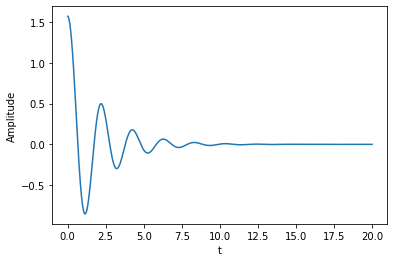

In [2]:
def f(x, t, s=1, L=1, g=9.81):
  dx1 = x[1]
  dx2 = - g / L *  np.sin(x[0]) - s * x[1]
  return [dx1, dx2]


s = 1
L= 1
g= 9.81

x0 = [np.pi/2, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)

plt.plot(t, phi[:, 0])
plt.xlabel('t')
plt.ylabel('Amplitude')

In [3]:
# Jacobian at the two fixed points (up and down) 
J_down = np.array([[0, 1], [-g / L, -s]])

J_up = np.array([[0, 1], [g / L, -s]])

np.linalg.eig(J_up)

(array([ 2.67175031, -3.67175031]), array([[ 0.35053751, -0.26277828],
        [ 0.93654869,  0.96485624]]))

In [ ]:
np.linalg.eig(J_down)

Text(0, 0.5, 'Amplitude')

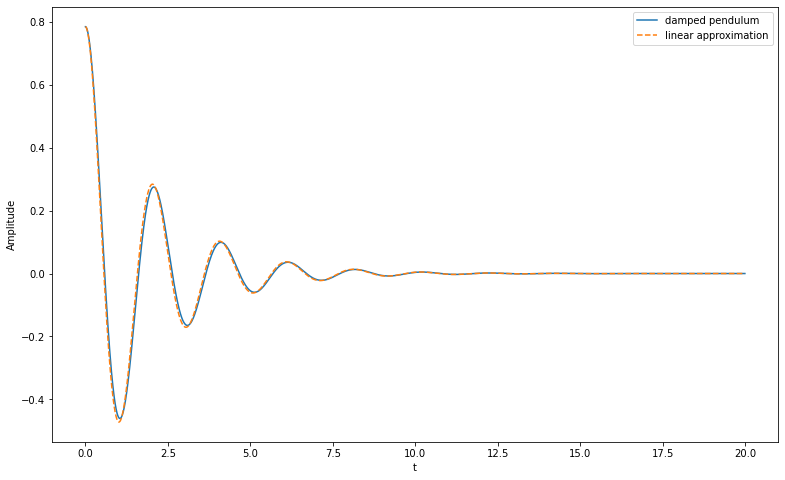

In [9]:
# linearized dynamics with Jacobian  
def lin_f(x, t, A=J_down):
  return np.dot(A, x)

x0 = [np.pi/4, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)
phi_approx = odeint(lin_f, x0, t)

plt.figure(figsize=(13, 8))
plt.plot(t, phi[:, 0], label='damped pendulum')
plt.plot(t, phi_approx[:, 0], '--', label='linear approximation')
plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')

In [ ]:
np.linalg.matrix_rank(ctl.ctrb(J_up, [[0],[1]]))

2